In [1]:
#3rd trial
#Preprocess the weather data more
#Drop more useless columns to simplify the data

In [2]:
import pandas as pd
import numpy as np
weather = pd.read_csv('../assets/weather_2.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Restarting the pre-processing process to get a "new-look" for the weather data

In [4]:
pd.options.display.max_columns = None
weather.head(2)

,Date,Year,Month,Day,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007-05-01,2007,5,1,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,0 days 04:48:00.000000000,0 days 18:49:00.000000000,0.0,29.14,29.820,2.20,26.0,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-02,2007,5,2,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,0 days 04:47:00.000000000,0 days 18:50:00.000000000,0.0,29.41,30.085,13.15,3.0,13.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
weather.columns

Index(['Date', 'Year', 'Month', 'Day', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG',
       'FG+', 'MIFG', 'SQ', 'SN', 'VCFG', 'GR'],
      dtype='object')

In [6]:
weather['Sunrise'] = pd.to_timedelta(weather['Sunrise'])
weather['Sunset'] = pd.to_timedelta(weather['Sunset'])

In [7]:
#Feature engineering: Daylight 
weather['Daylight'] = weather['Sunset'] - weather['Sunrise']

In [8]:
weather = weather.drop(['Sunset','Sunrise'],axis=1)

In [9]:
#changing Daylight back to float, numbers are in mintues!
weather['Daylight'] = weather['Daylight'].astype('timedelta64[m]')

In [10]:
#Dropping the Weather Code in this model to test
weather = weather.drop(['BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU',
       'TS', 'DZ', 'BCFG', 'FG+', 'MIFG', 'SQ', 'SN', 'VCFG', 'GR'],axis=1)

In [11]:
#This is to prepare the data to be merged with train/test data

weather_2 = weather.groupby(['Year','Month']).agg({'Tmax':'mean',
                                                   'Tmin':'mean', 
                                                   'Tavg':'mean', 
                                                   'Depart':'mean', 
                                                   'DewPoint':'mean',
                                                   'WetBulb':'mean',
                                                   'Heat': 'mean',
                                                   'Cool':'mean',
                                                   'PrecipTotal':'mean',
                                                   'StnPressure':'mean',
                                                   'SeaLevel':'mean',
                                                   'ResultSpeed':'mean',
                                                   'ResultDir':'mean',
                                                   'AvgSpeed':'mean',
                                                   'Daylight':'mean'})

weather_2

Tmax       Tmin       Tavg    Depart   DewPoint    WetBulb  \
Year Month                                                                    
2007 5      75.758065  53.032258  64.612903  5.258065  45.790323  54.580645   
     6      81.433333  62.516667  72.200000  3.333333  56.600000  62.983333   
     7      83.177419  64.709677  74.193548  0.677419  58.838710  64.758065   
     8      83.048387  67.145161  75.387097  3.322581  64.096774  68.161290   
     9      79.200000  58.316667  68.916667  4.433333  53.050000  59.900000   
     10     68.387097  50.822581  59.838710  7.129032  47.080645  53.177419   
2008 5      66.129032  45.935484  56.322581 -2.935484  42.306452  49.741935   
     6      81.016667  61.700000  71.616667  2.866667  57.333333  63.000000   
     7      84.112903  64.693548  74.612903  0.935484  60.774194  66.096774   
     8      81.774194  64.322581  73.306452  1.193548  59.419355  64.725806   
     9      75.383333  58.166667  67.000000  2.500000  56.250000  60.600000   
     10     61.870968  44.693548  53.500000  0.709677  40.580645  47.322581   
2009 5      70.677419  50.419355  60.758065  1.322581  44.129032  52.193548   
     6      77.183333  59.283333  68.516667 -0.366667  55.400000  60.533333   
     7      78.629032  61.725806  70.403226 -3.774194  56.129032  62.032258   
     8      79.225806  62.677419  71.225806 -1.064516  58.806452  63.596774   
     9      74.066667  57.366667  65.983333  1.766667  55.616667  59.883333   
     10     55.483871  42.951613  49.483871 -3.032258  41.580645  45.645161   
2010 5      71.193548  53.161290  62.419355  3.193548  48.596774  54.854839   
     6      80.216667  62.800000  71.800000  3.233333  60.350000  64.650000   
     7      87.080645  69.080645  78.354839  4.612903  64.016129  69.064516   
     8      85.451613  68.322581  77.112903  5.225806  63.564516  68.403226   
     9      74.383333  56.816667  65.833333  1.566667  52.100000  58.033333   
     10     66.790323  45.870968  56.612903  4.129032  40.177419  48.483871   
2011 5      68.354839  49.193548  59.016129 -0.645161  47.967742  53.112903   
     6      79.516667  60.733333  70.366667  1.400000  57.483333  62.666667   
     7      88.967742  70.596774  80.064516  6.000000  64.548387  70.048387   
     8      82.612903  65.338710  74.258065  2.000000  61.967742  66.516129   
     9      70.216667  55.466667  63.050000 -1.400000  52.266667  56.983333   
     10     64.887097  45.467742  55.370968  2.967742  42.177419  48.661290   
2012 5      75.935484  55.354839  65.887097  7.064516  47.403226  55.983871   
     6      84.816667  63.300000  74.316667  6.000000  53.733333  62.433333   
     7      91.564516  71.790323  82.000000  8.000000  64.274194  70.306452   
     8      84.209677  64.500000  74.580645  1.741935  58.225806  64.580645   
     9      74.783333  55.233333  65.316667  0.600000  50.616667  57.083333   
     10     60.887097  43.693548  52.500000 -0.419355  40.580645  46.983871   
2013 5      71.741935  51.645161  62.000000  2.483871  47.709677  54.419355   
     6      78.333333  59.800000  69.300000  0.533333  56.466667  61.550000   
     7      82.225806  65.612903  74.129032  0.032258  61.112903  66.032258   
     8      82.887097  64.403226  73.919355  1.483871  59.887097  64.548387   
     9      77.716667  58.500000  68.400000  3.666667  54.816667  60.333333   
     10     62.822581  45.129032  54.209677  1.258065  44.016129  49.177419   
2014 5      72.193548  51.564516  62.145161  1.903226  46.596774  53.693548   
     6      81.600000  62.350000  72.250000  2.966667  58.050000  63.633333   
     7      80.354839  62.370968  71.645161 -2.709677  56.677419  62.790323   
     8      82.532258  66.290323  74.629032  2.193548  62.274194  66.709677   
     9      74.416667  55.616667  65.250000  0.333333  53.083333  58.166667   
     10     61.548387  45.161290  53.661290  0.193548  42.354839  48.258065   

                 Heat       Cool  PrecipTotal  StnPressure   SeaLe

In [12]:
weather_2 = weather_2.reset_index()

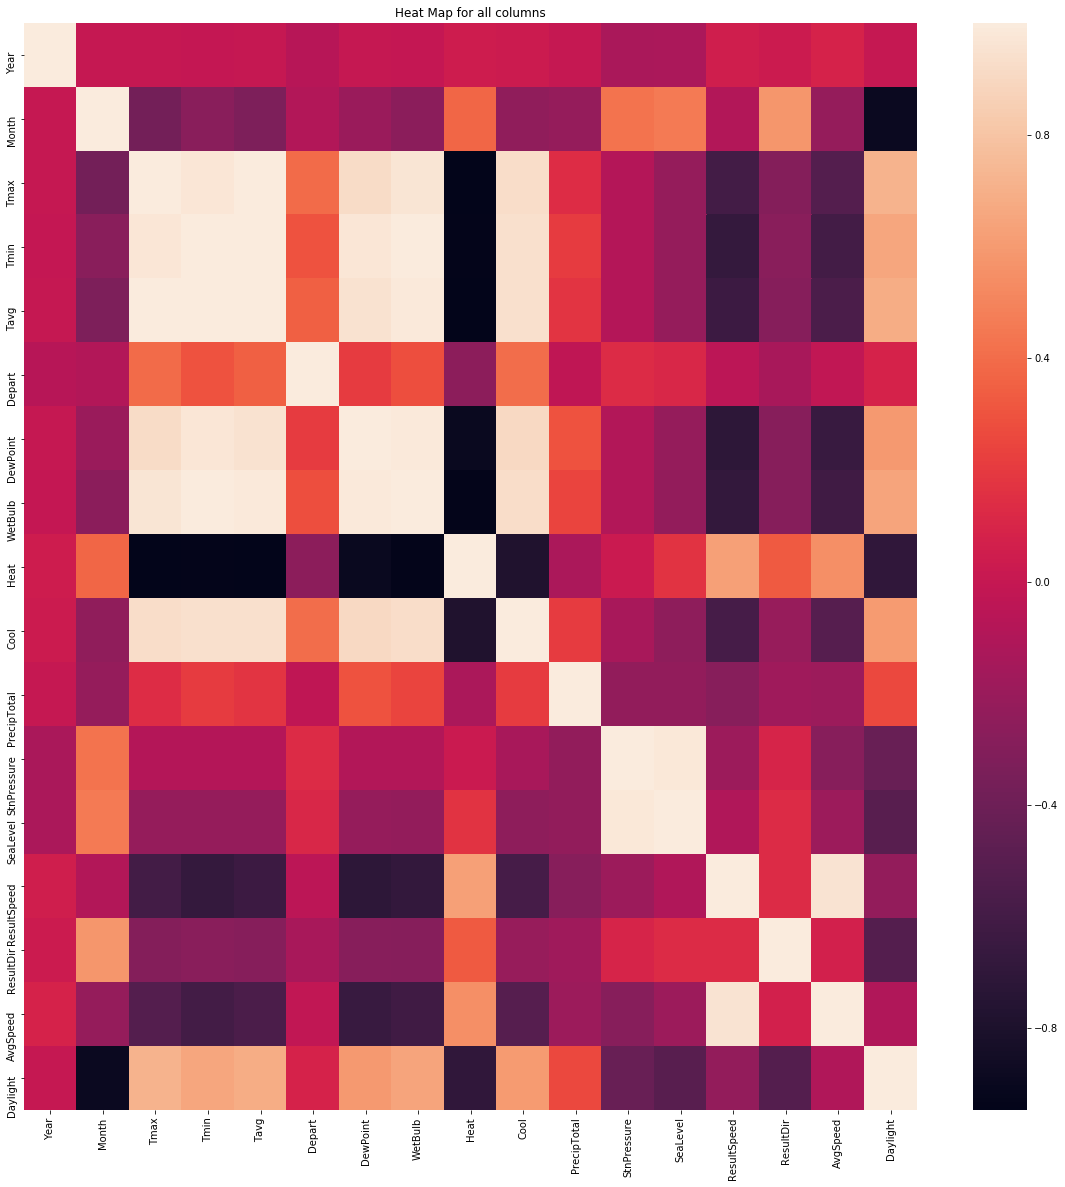

In [13]:
#to find out the general correlation between variables first
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(weather_2.corr(), ax = ax, annot=False, annot_kws={"size": 10})

#Since there are quite a number of correlated variables
#Will try to combine them via PCA

In [14]:
#1st PCA using these 8 columns
COLUMNS = ['Tmax', 'Tmin', 'Tavg', 'Depart','DewPoint', 'WetBulb', 'Heat', 'Cool',]

X = weather_2[COLUMNS]

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Xn)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[-3.79206845e-01, -3.81892372e-01, -3.83004584e-01,
        -1.41829064e-01, -3.70285283e-01, -3.80794968e-01,
         3.60213736e-01, -3.62880774e-01],
       [-3.74115707e-02,  7.60645396e-02,  1.88172048e-02,
        -9.65458839e-01,  1.74305286e-01,  1.01440637e-01,
        -1.14330998e-01, -8.12747900e-02],
       [-1.42165910e-01,  6.73676808e-02, -3.70368763e-02,
        -9.73560264e-02,  1.52349076e-01,  4.45625288e-02,
         7.11089630e-01,  6.58449695e-01],
       [ 4.76964335e-01, -5.74913326e-02,  2.14187081e-01,
        -1.94682684e-01, -7.02221504e-01, -2.65614988e-01,
        -6.50411484e-02,  3.42820074e-01],
       [ 5.43988958e-01, -7.43247823e-01, -8.78876841e-02,
        -1.98349987e-02,  3.27022791e-01,  1.37590906e-01,
         1.27610073e-01, -3.71688124e-02],
       [ 8.63101003e-02,  7.13058183e-02,  9.49376089e-02,
         8.27711292e-04,  4.57322318e-01, -8.67784474e-01,
        -1.00593895e-01,  7.83548621e-02],
       [ 5.51110697e-01,  5.320027

In [18]:
pc1_ev = pca.components_[0]
pc2_ev = pca.components_[1]
# Quick way of viewing, rather than looping through each feature
pd.Series(pc1_ev, index=COLUMNS)

Tmax       -0.379207
Tmin       -0.381892
Tavg       -0.383005
Depart     -0.141829
DewPoint   -0.370285
WetBulb    -0.380795
Heat        0.360214
Cool       -0.362881
dtype: float64

In [19]:
weather_pca = pca.transform(Xn)
weather_pca = pd.DataFrame(weather_pca, 
                       columns=['PC'+str(i+1) for i in range(len(COLUMNS))],
                       index=weather_2.index)
weather_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.086340,-1.459570,-0.720604,0.397507,0.019844,-0.001802,0.003064,-3.425441e-16
1,-1.578003,-0.305570,-0.182808,0.088265,-0.046072,-0.007905,0.003293,3.300994e-16
2,-2.106591,0.745860,0.094519,0.272782,-0.032088,0.006640,0.000941,-3.106902e-16
3,-2.977264,-0.041406,0.341098,-0.446962,-0.013494,-0.043242,-0.004782,2.654493e-16
4,-0.532294,-0.864356,-0.439337,0.080195,0.063336,-0.003808,0.012264,5.397817e-16


In [20]:
exp_var = pca.explained_variance_ratio_
exp_var

array([8.48745757e-01, 1.15154603e-01, 2.63343108e-02, 8.97951834e-03,
       7.25752155e-04, 5.74573830e-05, 2.60079795e-06, 1.63684427e-32])

Text(0, 0.5, 'cumulative % of explained variance')

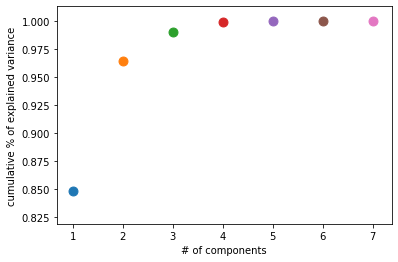

In [21]:
for i in range(1,len(pca.explained_variance_ratio_)):
    plt.scatter(i, sum(pca.explained_variance_ratio_[:i]), s=80)
plt.xlabel("# of components")
plt.ylabel('cumulative % of explained variance')

#The first two PC, PC1 and PC2 amounts to more than 95% of the information stored

In [22]:
pd.DataFrame({'PC1': pc1_ev, 'PC2': pc2_ev},
             index=COLUMNS)

,PC1,PC2
Tmax,-0.379207,-0.037412
Tmin,-0.381892,0.076065
Tavg,-0.383005,0.018817
Depart,-0.141829,-0.965459
DewPoint,-0.370285,0.174305
WetBulb,-0.380795,0.101441
Heat,0.360214,-0.114331
Cool,-0.362881,-0.081275


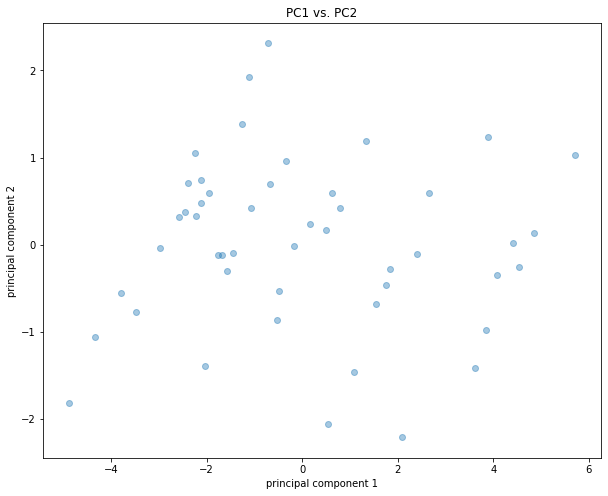

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_pca.PC1.values, weather_pca.PC2.values, alpha=0.4)

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [24]:
#2st PCA using these 5 columns
COLUMNS2 = ['PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir','AvgSpeed']

X2 = weather_2[COLUMNS2]

In [25]:
ss = StandardScaler()
X2n = ss.fit_transform(X2)

pca2 = PCA()
pca2.fit(X2n)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pc1_ev_2 = pca2.components_[0]
pc2_ev_2 = pca2.components_[1]
pc3_ev_2 = pca2.components_[2]
# Quick way of viewing, rather than looping through each feature
pd.Series(pc1_ev_2, index=COLUMNS2)

PrecipTotal   -0.016251
StnPressure    0.533180
SeaLevel       0.494408
ResultSpeed   -0.464062
ResultDir      0.015601
AvgSpeed      -0.505389
dtype: float64

In [27]:
weather_pca2 = pca2.transform(X2n)
weather_pca2 = pd.DataFrame(weather_pca2, 
                       columns=['PC'+str(i+1) for i in range(len(COLUMNS2))],
                       index=weather_2.index)
weather_pca2.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.489807,2.961671,2.040255,0.297163,-0.127669,0.065849
1,-0.473280,-0.221587,0.679108,-0.883098,0.115408,0.138087
2,0.664262,-0.437710,-0.103607,-0.485611,-0.269077,-0.041264
3,1.700944,-2.880404,0.686141,0.861336,-0.159050,-0.034216
4,1.370244,1.877993,0.736614,-0.360015,-0.213333,0.002266


In [28]:
exp_var2 = pca2.explained_variance_ratio_
exp_var2

array([0.39275804, 0.32258355, 0.15673964, 0.12107136, 0.00518169,
       0.00166572])

Text(0, 0.5, 'cumulative % of explained variance')

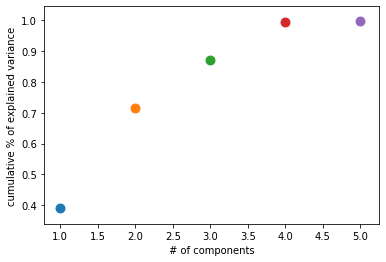

In [29]:
for i in range(1,len(pca2.explained_variance_ratio_)):
    plt.scatter(i, sum(pca2.explained_variance_ratio_[:i]), s=80)
plt.xlabel("# of components")
plt.ylabel('cumulative % of explained variance')

#The first 3 PCs, PC1,PC2,PC3 amounts to more than 80% of the information stored

In [30]:
pd.DataFrame({'PC1': pc1_ev_2, 'PC2': pc2_ev_2, 'PC3':pc3_ev_2},
             index=COLUMNS2)

,PC1,PC2,PC3
PrecipTotal,-0.016251,-0.475389,0.099707
StnPressure,0.533180,0.374020,0.185248
SeaLevel,0.494408,0.422302,0.184081
ResultSpeed,-0.464062,0.469948,0.160427
ResultDir,0.015601,0.273823,-0.926035
AvgSpeed,-0.505389,0.399932,0.196416


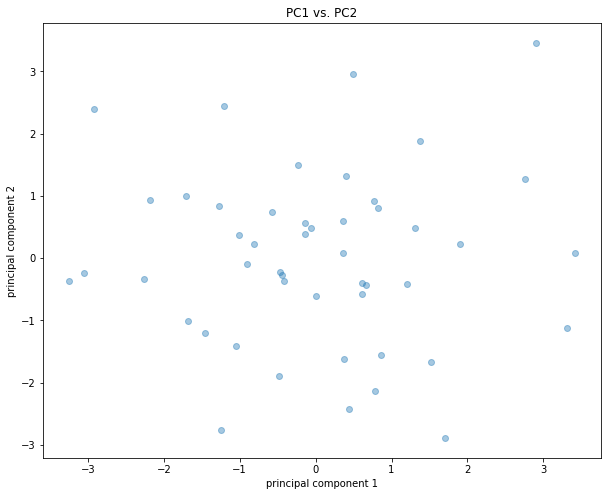

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_pca2.PC1.values, weather_pca2.PC2.values, alpha=0.4)

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [32]:
#merging the data back together with weather
weather_2 = weather_2.drop(COLUMNS,axis=1)
weather_2 = weather_2.drop(COLUMNS2,axis=1)

In [33]:
weather_2 = pd.concat([weather_2, weather_pca[['PC1','PC2']]],axis=1)
weather_2 = pd.concat([weather_2, weather_pca2[['PC1','PC2']]],axis=1)

In [34]:
weather_2.columns = ['Year', 'Month', 'Daylight', 'PC1', 'PC2', 'PC1y', 'PC2y']

In [35]:
weather_2.head(2)

,Year,Month,Daylight,PC1,PC2,PC1y,PC2y
0,2007,5,872.806452,1.086340,-1.45957,0.489807,2.961671
1,2007,6,910.333333,-1.578003,-0.30557,-0.473280,-0.221587


### Re-doing the preprocessing for train/test data as well to fit this weather data

In [36]:
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')

In [37]:
test = test.drop(['Id'], axis=1)

In [38]:
#checking the shape of both files
print(train.shape)
print(test.shape)

(10506, 12)
(116293, 10)


In [39]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [40]:
#change Species into dummy variables
column = ['Species']

train_explore = pd.get_dummies(data = train, prefix=column, columns = column, drop_first=True)

In [41]:
train_explore.groupby(['WnvPresent']).sum()

#~10% of the Mosquitos carry the virus

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
WnvPresent,,,,,,,,,,,
0,354994,416520.964695,-873038.944137,77816,120520,2459.0,4490.0,2691.0,86.0,6.0,222.0
1,19942,23062.044683,-48336.289135,4336,14519,240.0,262.0,49.0,0.0,0.0,0.0


In [42]:
combined = pd.merge(train,test,how='outer')

In [43]:
combined.shape

(126799, 12)

In [44]:
#changing Date to type - date
combined['Date'] = pd.to_datetime(combined['Date'])

In [45]:
combined = combined.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'],axis=1)

In [46]:
combined.head(2)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1.0,0.0
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1.0,0.0


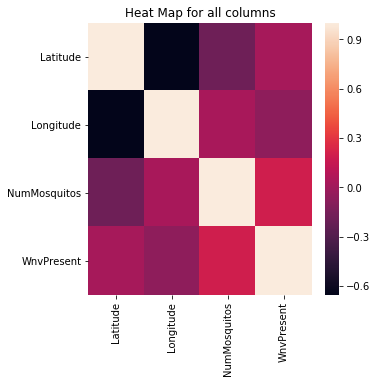

In [47]:
#to find out the general correlation between variables first
fig, ax = plt.subplots(figsize=(5,5)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(combined.corr(), ax = ax, annot=False, annot_kws={"size": 5})

#Not much correlation except for Lat/Long

In [48]:
#change Species into dummy variables
column = ['Species']

combined = pd.get_dummies(data = combined, prefix=column, columns = column, drop_first=True)

In [49]:
combined['Date'] = pd.to_datetime(combined['Date'])
combined['Year'] = combined['Date'].dt.year
combined['Month'] = combined['Date'].dt.month
combined.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5


In [50]:
combined.shape

(126799, 15)

In [51]:
weather_2.head(2)

,Year,Month,Daylight,PC1,PC2,PC1y,PC2y
0,2007,5,872.806452,1.086340,-1.45957,0.489807,2.961671
1,2007,6,910.333333,-1.578003,-0.30557,-0.473280,-0.221587


In [52]:
full = pd.merge(combined,weather_2, on=['Year','Month'])

In [53]:
full.shape

(126799, 20)

In [54]:
full.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,PC1,PC2,PC1y,PC2y
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5,872.806452,1.08634,-1.45957,0.489807,2.961671
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5,872.806452,1.08634,-1.45957,0.489807,2.961671


In [55]:
#Split the file back into it's test and train files
train2 = full.loc[full['Year'].isin([2007,2009,2011,2013])]
test2 = full.loc[full['Year'].isin([2008,2010,2012,2014])]

In [56]:
print(train2.shape)
print(test2.shape)

(10506, 20)
(116293, 20)


In [57]:
train2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,PC1,PC2,PC1y,PC2y
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5,872.806452,1.08634,-1.45957,0.489807,2.961671
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5,872.806452,1.08634,-1.45957,0.489807,2.961671


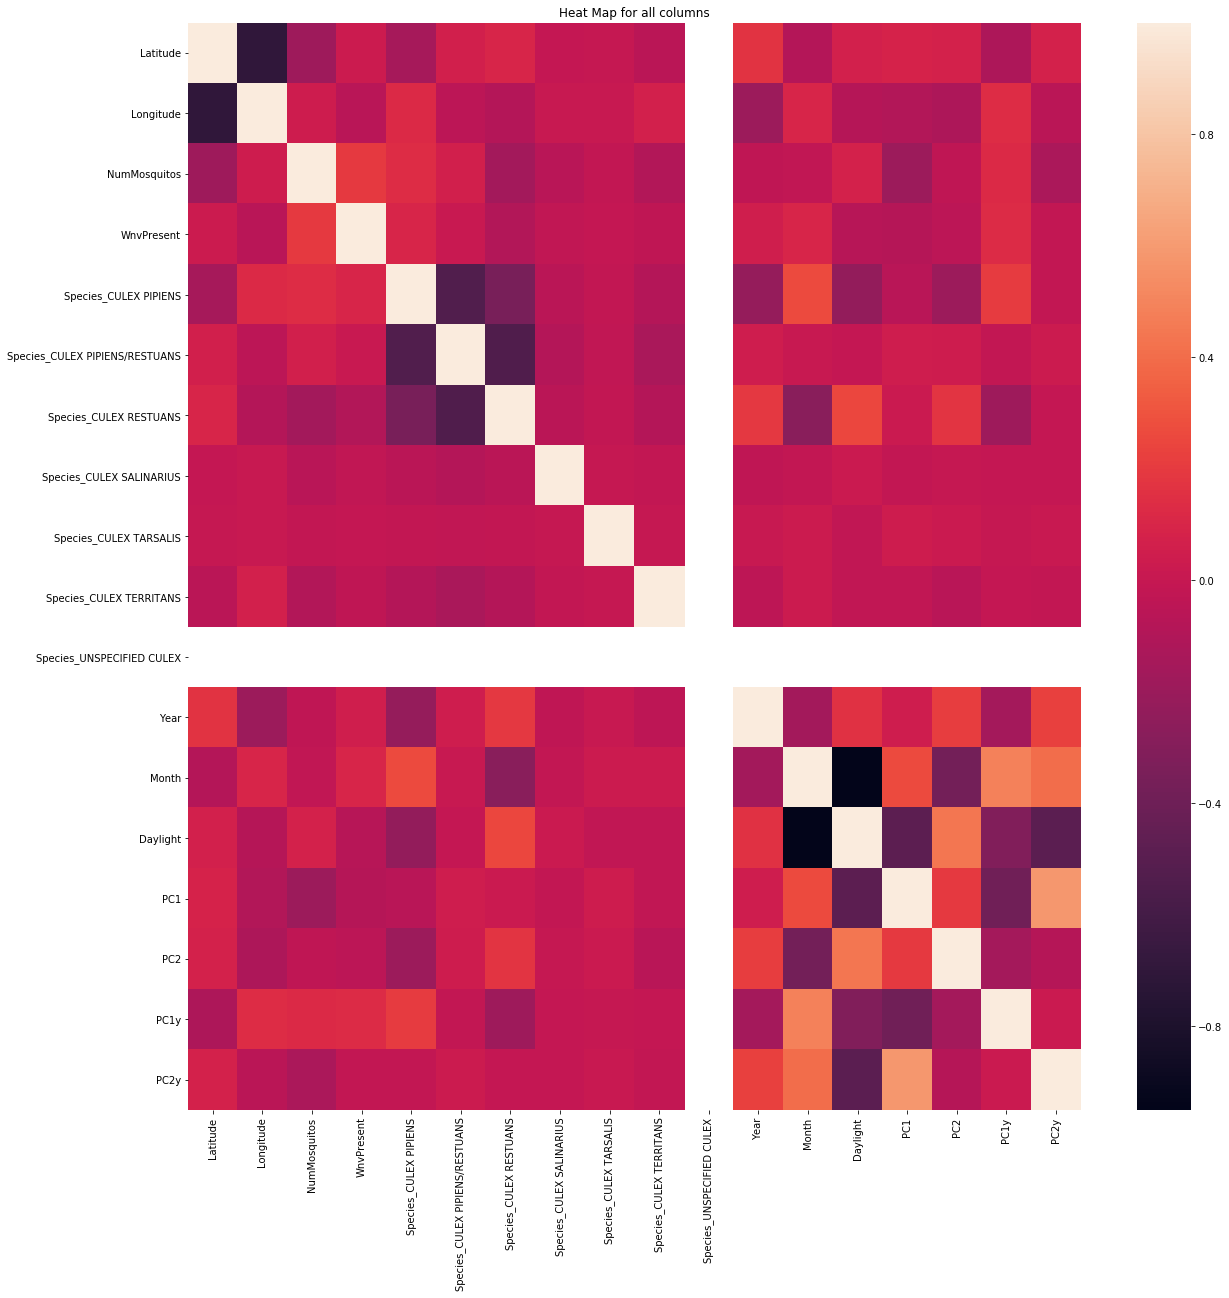

In [58]:
#to find out the general correlation between variables first
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(train2.corr(), ax = ax, annot=False, annot_kws={"size": 20})
#Again some correlation between the Long and Latitudes
#Some correlations between the species

In [59]:
corr_matrix = train2.corr()
corr_matrix['WnvPresent'].sort_values(ascending = False)

WnvPresent                        1.000000
NumMosquitos                      0.196820
PC1y                              0.128814
Month                             0.100143
Species_CULEX PIPIENS             0.096206
Year                              0.050865
Latitude                          0.028697
Species_CULEX PIPIENS/RESTUANS    0.010960
Species_CULEX TARSALIS           -0.005624
PC2y                             -0.013184
Species_CULEX SALINARIUS         -0.021373
Species_CULEX TERRITANS          -0.034566
PC2                              -0.050964
Longitude                        -0.060345
Daylight                         -0.073487
PC1                              -0.077599
Species_CULEX RESTUANS           -0.092094
Species_UNSPECIFIED CULEX              NaN
Name: WnvPresent, dtype: float64

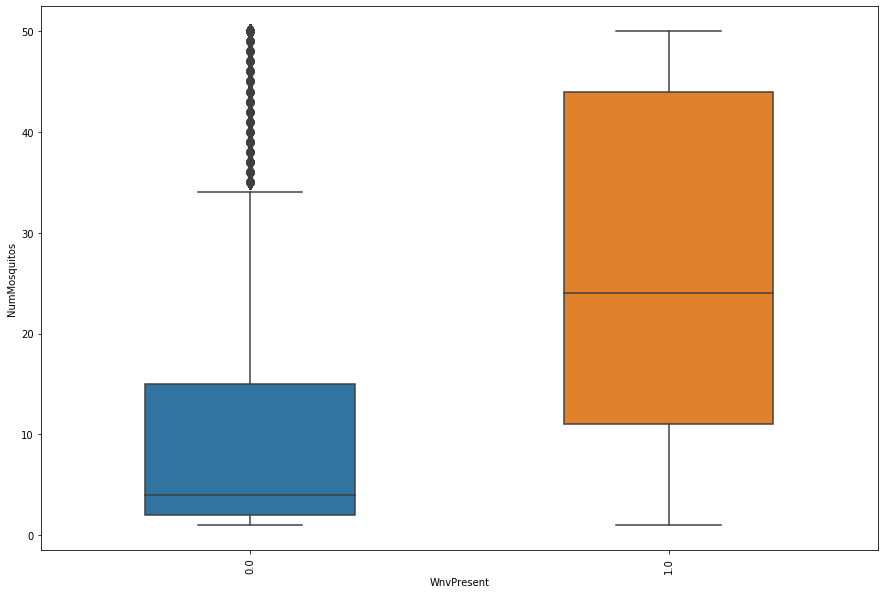

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
ax = sns.boxplot(y=train2.NumMosquitos, x=train2.WnvPresent, orient = 'v', width = 0.5, fliersize = 10).set(
    xlabel='WnvPresent', 
    ylabel='NumMosquitos')

#In general

In [61]:
corr_matrix['NumMosquitos'].sort_values(ascending = False)

NumMosquitos                      1.000000
WnvPresent                        0.196820
Species_CULEX PIPIENS             0.134754
PC1y                              0.119809
Daylight                          0.073968
Species_CULEX PIPIENS/RESTUANS    0.061499
Longitude                         0.036633
Species_CULEX TARSALIS           -0.017317
Month                            -0.026040
Year                             -0.029611
PC2                              -0.029878
Species_CULEX SALINARIUS         -0.062886
Species_CULEX TERRITANS          -0.096136
PC2y                             -0.120596
Species_CULEX RESTUANS           -0.158393
Latitude                         -0.184806
PC1                              -0.192266
Species_UNSPECIFIED CULEX              NaN
Name: NumMosquitos, dtype: float64

In [62]:
corr_matrix['Daylight'].sort_values(ascending = False)

Daylight                          1.000000
PC2                               0.437506
Species_CULEX RESTUANS            0.249205
Year                              0.158609
NumMosquitos                      0.073968
Latitude                          0.063148
Species_CULEX SALINARIUS          0.019430
Species_CULEX PIPIENS/RESTUANS   -0.009934
Species_CULEX TERRITANS          -0.024264
Species_CULEX TARSALIS           -0.027924
WnvPresent                       -0.073487
Longitude                        -0.075828
Species_CULEX PIPIENS            -0.233306
PC1y                             -0.312804
PC1                              -0.482615
PC2y                             -0.490088
Month                            -0.950132
Species_UNSPECIFIED CULEX              NaN
Name: Daylight, dtype: float64

In [63]:
train2.columns

Index(['Date', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS',
       'Species_UNSPECIFIED CULEX', 'Year', 'Month', 'Daylight', 'PC1', 'PC2',
       'PC1y', 'PC2y'],
      dtype='object')

In [64]:
train3 = train2.groupby(['Date','Trap']).agg({'Year':'max',
                                              'Month':'max',
                                              'Latitude':'max',
                                              'Longitude':'max',
                                              'Species_CULEX PIPIENS':'sum',
                                              'Species_CULEX PIPIENS/RESTUANS':'sum',
                                              'Species_CULEX RESTUANS':'sum',
                                              'Species_CULEX SALINARIUS':'sum',
                                              'Species_CULEX TARSALIS':'sum',
                                              'Species_CULEX TERRITANS':'sum',
                                              'Species_UNSPECIFIED CULEX':'sum',
                                              'Daylight':'mean',
                                              'PC1':'mean',
                                              'PC2':'mean',
                                              'PC1y':'mean',
                                              'PC2y':'mean',
                                              'NumMosquitos':'sum',
                                              'WnvPresent':'max'})

<function matplotlib.pyplot.legend(*args, **kwargs)>

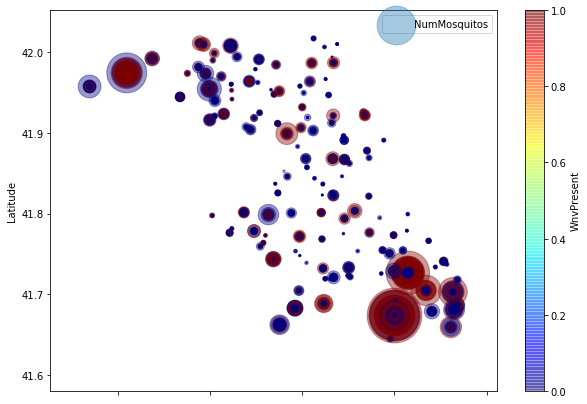

In [65]:
train3.plot(kind='scatter', x= 'Longitude', y='Latitude', alpha=0.4,
             s=train3['NumMosquitos'], label='NumMosquitos', figsize=(10,7),
            c ='WnvPresent', cmap = plt.get_cmap("jet"),colorbar=True)
plt.legend

#Size of circle = Number of Mosquitos
#Colour['Red'] = WNV Present

In [66]:
train3.head()

Year  Month   Latitude  Longitude  Species_CULEX PIPIENS  \
Date       Trap                                                             
2007-05-29 T002  2007      5  41.954690 -87.800991                      0   
           T007  2007      5  41.994991 -87.769279                      0   
           T015  2007      5  41.974089 -87.824812                      0   
           T045  2007      5  41.921600 -87.666455                      0   
           T046  2007      5  41.891118 -87.654491                      0   

                 Species_CULEX PIPIENS/RESTUANS  Species_CULEX RESTUANS  \
Date       Trap                                                           
2007-05-29 T002                               1                       1   
           T007                               0                       1   
           T015                               1                       1   
           T045                               0                       1   
           T046                               0                       1   

                 Species_CULEX SALINARIUS  Species_CULEX TARSALIS  \
Date       Trap                                                     
2007-05-29 T002                         0                       0   
           T007                         0                       0   
           T015                         0                       0   
           T045                         0                       0   
           T046                         0                       0   

                 Species_CULEX TERRITANS  Species_UNSPECIFIED CULEX  \
Date       Trap                                                       
2007-05-29 T002                        0                          0   
           T007                        0                          0   
           T015                        0                          0   
           T045                        0                          0   
           T046                        0                          0   

                   Daylight      PC1      PC2      PC1y      PC2y  \
Date       Trap                                                     
2007-05-29 T002  872.806452  1.08634 -1.45957  0.489807  2.961671   
           T007  872.806452  1.08634 -1.45957  0.489807  2.961671   
           T015  872.806452  1.08634 -1.45957  0.489807  2.961671   
           T045  872.806452  1.08634 -1.45957  0.489807  2.961671   
           T046  872.806452  1.08634 -1.45957  0.489807  2.961671   

                 NumMosquitos  WnvPresent  
Date       Trap                            
2007-05-29 T002           2.0         0.0  
           T007           1.0         0.0  
           T015           5.0         0.0  
           T045           2.0         0.0  
           T046           1.0         0.0

In [67]:
train3 = train3.reset_index()

In [68]:
train3 = train3.drop(['Date','Trap'],axis=1)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [70]:
train3.head(2)

,Year,Month,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Daylight,PC1,PC2,PC1y,PC2y,NumMosquitos,WnvPresent
0,2007,5,41.954690,-87.800991,0,1,1,0,0,0,0,872.806452,1.08634,-1.45957,0.489807,2.961671,2.0,0.0
1,2007,5,41.994991,-87.769279,0,0,1,0,0,0,0,872.806452,1.08634,-1.45957,0.489807,2.961671,1.0,0.0


### Selecting columns to include to X

In [71]:
X = train3.iloc[:,2:16]
ss = StandardScaler()
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
y = train3.WnvPresent

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
Xs.columns

Index(['Latitude', 'Longitude', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Species_UNSPECIFIED CULEX', 'Daylight',
       'PC1', 'PC2', 'PC1y', 'PC2y'],
      dtype='object')

In [73]:
#Train,test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, random_state=42 , train_size=0.7 , test_size=0.3,stratify=y)

In [74]:
model = []
parameters = []
scores = []
precision = []
recall = []
ra_score = []

# To put the name of model, models from sklearn, and hyperparameters of the model we want to search through in order

names = ['Decision Tree', 'RandomForest', 'LogReg','KNN','SVC','AdaBoost', 'BaggingClass', 'GradientBoost']

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

params = [
    {'clf__max_depth': [None, 10, 15, 20, 30, 35],
    'clf__min_samples_split': [5,10,15,20,25,30]}, #DecisionTree

    {'clf__max_depth': [None,50,75,100,150,200],
     'clf__min_samples_split': [5,10,15,20,30]}, #RandomForest
    
    {'clf__C':[1,3,5,10],
     'clf__solver':['lbfgs', 'liblinear', 'sag', 'saga'],
     'clf__max_iter':[50,100,125,150,175,200]}, #LogisticRegression
    
    {'clf__n_neighbors':[3,5,10,15,20,25],
     'clf__weights':['uniform','distance'],
     'clf__p':[1,2,3]}, #KNeighborsClassifier
    
    {'clf__kernel':['rbf']}, #SVC - 'something wrong with 'sigmoid','poly','linear'
    
    {'clf__n_estimators':[25,40,50,100,200,500]}, #AdaBoost
    
    {'clf__n_estimators':[10,30,50,100],
     'clf__max_samples':[1,5,10],
     'clf__max_features':[1,5,10]}, #BaggingClassifier
    
    {'clf__loss' : ['deviance', 'exponential'],
     'clf__n_estimators':[50,75,100,200,500],
     'clf__max_features': [None, 'auto','sqrt','log2']} #GradientBoosting
]

for name, estimator, param in zip(names, estimators, params):
    clf_pipe = Pipeline([
        # not sure if we need to scale the X
        # removed ('ss', StandardScaler),
        ('clf', estimator)
    ])
#     cv = StratifiedKFold(shuffle=True, n_splits=3)
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    gs = GridSearchCV(clf_pipe, param_grid=param, cv=cv, verbose=10, n_jobs=-1)
    gs.fit(X_train, y_train)
    
    print(name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    
    print('Model Score on X_train: {}'.format(grid_model.score(X_train, y_train)))
    
    # Prediction and score
    pred = grid_model.predict(X_test)
    print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, pred)))
    
    
    # Confusion Matrix 
    conf_matrix = confusion_matrix(y_test, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print('TN: {}, FP:{}, FN:{}, TP:{}'.format(tn,fp,fn,tp))
    print('Precision of the model is {}'. format(tp/(tp+fp)))
    print('Recall of the model is {}'.format(tp/(tp+fn)))
    
    #roc_auc
    ra = roc_auc_score(y_test, pred)
    print ('ROC_AUC: {}'.format(ra))
   
    
    print('\n')
    model.append(name)
    parameters.append(gs.best_params_)
    scores.append(accuracy_score(y_test, pred))
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    ra_score.append(ra) 
    
results = pd.DataFrame({'model': model, 
              'parameters': parameters, 
              'scores': scores, 
              'recall': recall, 
              'precision': precision,
              'roc_auc':ra_score
                       })
results

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1897s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  74 out of 108 | elapsed:    4.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  85 out of 108 | elapsed:    4.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch compu

Decision Tree
Best Score: 0.9227202472952086
Best Params: {'clf__max_depth': 10, 'clf__min_samples_split': 25}
Model Score on X_train: 0.9377901578458682
Accuracy score of prediction: 0.9191335740072202
TN: 1247, FP:22, FN:90, TP:26
Precision of the model is 0.5416666666666666
Recall of the model is 0.22413793103448276
ROC_AUC: 0.6034007228064454


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.8s finished
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RandomForest
Best Score: 0.9252962390520351
Best Params: {'clf__max_depth': 75, 'clf__min_samples_split': 20}
Model Score on X_train: 0.9356236459300526
Accuracy score of prediction: 0.9249097472924188
TN: 1257, FP:12, FN:92, TP:24
Precision of the model is 0.6666666666666666
Recall of the model is 0.20689655172413793
ROC_AUC: 0.5987201434743621


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1523s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   10.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the c

LogReg
Best Score: 0.9232354456465739
Best Params: {'clf__C': 1, 'clf__max_iter': 50, 'clf__solver': 'saga'}
Model Score on X_train: 0.9226245744351594
Accuracy score of prediction: 0.9249097472924188
TN: 1267, FP:2, FN:102, TP:14
Precision of the model is 0.875
Recall of the model is 0.1206896551724138
ROC_AUC: 0.559556805521589


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:   21.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   26.0s finished


KNN
Best Score: 0.9227202472952086
Best Params: {'clf__n_neighbors': 15, 'clf__p': 3, 'clf__weights': 'uniform'}
Model Score on X_train: 0.9241720829464563
Accuracy score of prediction: 0.9227436823104693
TN: 1262, FP:7, FN:100, TP:16
Precision of the model is 0.6956521739130435
Recall of the model is 0.13793103448275862
ROC_AUC: 0.566207440015217


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
Best Score: 0.9185986604842864
Best Params: {'clf__kernel': 'rbf'}
Model Score on X_train: 0.9251005880532343
Accuracy score of prediction: 0.91985559566787
TN: 1269, FP:0, FN:111, TP:5
Precision of the model is 1.0
Recall of the model is 0.04310344827586207
ROC_AUC: 0.521551724137931


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1092s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0294s.) Se

AdaBoost
Best Score: 0.9237506439979392
Best Params: {'clf__n_estimators': 25}
Model Score on X_train: 0.9241720829464563
Accuracy score of prediction: 0.9191335740072202
TN: 1257, FP:12, FN:100, TP:16
Precision of the model is 0.5714285714285714
Recall of the model is 0.13793103448275862
ROC_AUC: 0.5642373848536725


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  19 out of 108 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.1s finished
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in long_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in long_scalars
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


BaggingClass
Best Score: 0.9165378670788253
Best Params: {'clf__max_features': 1, 'clf__max_samples': 1, 'clf__n_estimators': 10}
Model Score on X_train: 0.9167440420922315
Accuracy score of prediction: 0.916245487364621
TN: 1269, FP:0, FN:116, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1509s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0411s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    6.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 110 out of 120 | elapsed:    7.2s remaining:    0.7s


GradientBoost
Best Score: 0.9252962390520351
Best Params: {'clf__loss': 'deviance', 'clf__max_features': 'sqrt', 'clf__n_estimators': 50}
Model Score on X_train: 0.9266480965645311
Accuracy score of prediction: 0.9249097472924188
TN: 1265, FP:4, FN:100, TP:16
Precision of the model is 0.8
Recall of the model is 0.13793103448275862
ROC_AUC: 0.5673894731121437




[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.8s finished


,model,parameters,scores,recall,precision,roc_auc
0,Decision Tree,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.919134,0.224138,0.541667,0.603401
1,RandomForest,"{'clf__max_depth': 75, 'clf__min_samples_split...",0.924910,0.206897,0.666667,0.598720
2,LogReg,"{'clf__C': 1, 'clf__max_iter': 50, 'clf__solve...",0.924910,0.120690,0.875000,0.559557
3,KNN,"{'clf__n_neighbors': 15, 'clf__p': 3, 'clf__we...",0.922744,0.137931,0.695652,0.566207
4,SVC,{'clf__kernel': 'rbf'},0.919856,0.043103,1.000000,0.521552
5,AdaBoost,{'clf__n_estimators': 25},0.919134,0.137931,0.571429,0.564237
6,BaggingClass,"{'clf__max_features': 1, 'clf__max_samples': 1...",0.916245,0.000000,NaN,0.500000
7,GradientBoost,"{'clf__loss': 'deviance', 'clf__max_features':...",0.924910,0.137931,0.800000,0.567389


### The following section is added to check the predict_proba scores

#### P/S: wasn't able to add this into the loop, so it was done manually instead

In [75]:
estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

In [76]:
model = DecisionTreeClassifier(max_depth = 10 , min_samples_split=25)
DTC = model.fit(X_train, y_train)
pred = DTC.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8165708812260535

In [77]:
model = RandomForestClassifier(max_depth = 100 , min_samples_split=30)
RF = model.fit(X_train, y_train)
pred = RF.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8678908181842886

In [78]:
model = LogisticRegression(C=3, max_iter=175 , solver='lbfgs')
LogReg = model.fit(X_train, y_train)
pred = LogReg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8468723675987067

In [79]:
model = KNeighborsClassifier(n_neighbors=25, p=2, weights='uniform')
Knn = model.fit(X_train, y_train)
pred = Knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8274571343170023

In [80]:
model = SVC(kernel='rbf', probability=True)
svc = model.fit(X_train, y_train)
pred = svc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7549523110785034

In [81]:
model = AdaBoostClassifier(n_estimators=25)
Ada = model.fit(X_train, y_train)
pred = Ada.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8647828863346104

In [82]:
model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
GB = model.fit(X_train, y_train)
pred = GB.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8711583924349883

### Use this as our final model

In [83]:
#use this final model
model = RandomForestClassifier(max_depth = 100 , min_samples_split=30)
RF = model.fit(X_train, y_train)
pred = RF.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8586111790440477

### Preprocessing the same way for the test set

In [84]:
test2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,PC1,PC2,PC1y,PC2y
10506,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,1,0,0,0,0,0,2008,6,910.333333,-1.450421,-0.092691,-2.263588,-0.333583
10507,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,1,0,0,0,0,2008,6,910.333333,-1.450421,-0.092691,-2.263588,-0.333583


In [85]:
test2.iloc[:,6:20].head(1)

,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,PC1,PC2,PC1y,PC2y
10506,0,1,0,0,0,0,0,2008,6,910.333333,-1.450421,-0.092691,-2.263588,-0.333583


In [86]:
X = pd.concat([test2.iloc[:,2:4],test2.iloc[:,6:20]],axis = 1)
X = X.drop(['Month','Year'],axis=1)
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [87]:
final_pred = model.predict_proba(Xs)[:,1]

In [88]:
final_pred

array([0.05743704, 0.03861789, 0.43416287, ..., 0.        , 0.        ,
       0.        ])

### From the final prediction, combine to create a new database for submission

In [89]:
sample = pd.read_csv('../assets/samplesubmission.csv')
sub = pd.DataFrame()
sub['Id']=sample['Id']
sub['WnvPresent'] = final_pred
print(sub.shape)
sub.head()

(116293, 2)


,Id,WnvPresent
0,1,0.057437
1,2,0.038618
2,3,0.434163
3,4,0.000000
4,5,0.000000


In [90]:
sub.to_csv('submission/sub4.csv',index=False)